In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
Image_size = 256
Batch_size = 32
Channels = 3
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage_no_patato",
    shuffle = True,
    image_size =(Image_size,Image_size),
    batch_size = Batch_size
)

Found 18486 files belonging to 12 classes.


In [3]:
class_names=  dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [4]:
len(dataset)

578

In [5]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 6  0 10  8  1  2  6  9  1  7  7  9  2  8  4  7 11  4  5  4 11  9  7  9
  7  9  9  6  7  3  4  2]


2024-08-13 10:44:18.097804: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
for image_batch,label_batch in dataset.take(1):
        # print(image_batch[0])
        # print(image_batch[0].numpy())
        print(image_batch[0].numpy().shape)

(256, 256, 3)


2024-08-13 10:44:18.124933: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


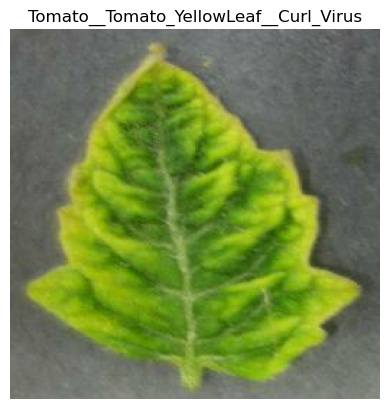

In [7]:
for image_batch,label_batch in dataset.take(1):
    # plt.imshow(image_batch[0].numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[0]])

2024-08-13 10:44:18.427585: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


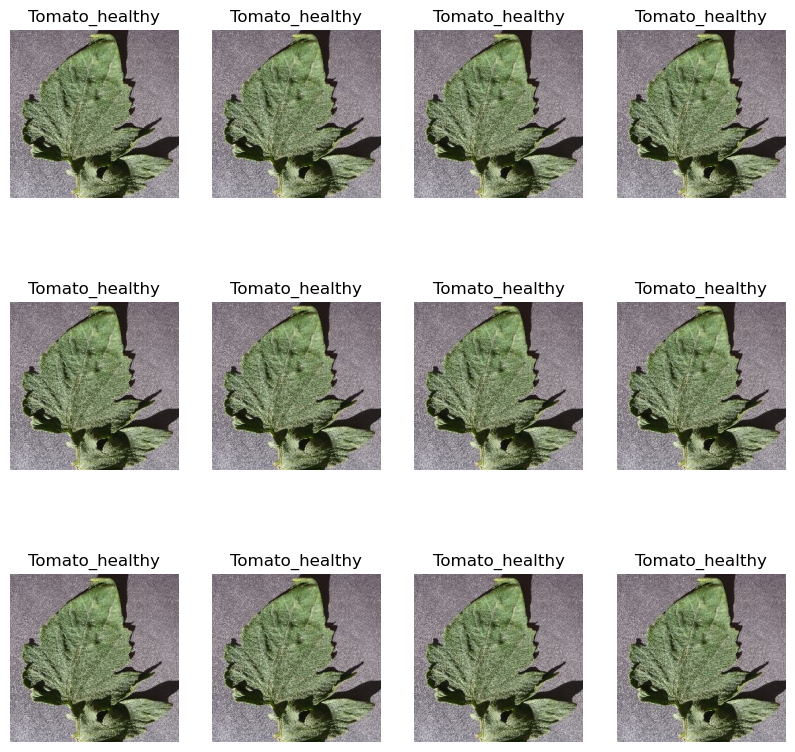

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for  i in range(12):
        ax = plt.subplot(3,4,i+1)
        # plt.imshow(image_batch[0].numpy())
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[0]])

In [9]:
Epochs =5

In [10]:
len(dataset)

578

In [11]:
# 80% ==> training
# 20% ==> 10% validation,10% test


In [12]:
train_size = 0.8
len(dataset)*train_size

462.40000000000003

In [13]:
train_ds = dataset.take(462)
len(train_ds)

462

In [14]:
test_ds = dataset.skip(462)
len(train_ds)

462

In [15]:
val_size = 0.1
len(dataset)*val_size

# so basically i need 6 sample from my test dataset

57.800000000000004

In [16]:
val_ds = test_ds.take(57)
len(val_ds)


57

In [17]:
test_ds = test_ds.skip(57)
len(test_ds)

59

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

462

In [21]:
len(val_ds)

57

In [22]:
len(test_ds)

59

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
# pip install tensorflow==2.6


In [25]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [26]:
# resize_and_rescale = tf.keras.Sequential([
#   layers.experimental.preprocessing.Resizing(Image_size, Image_size),
#   layers.experimental.preprocessing.Rescaling(1./255),
# ])
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1.0/255),
])


In [27]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [28]:
# input_shape = (Image_size,Image_size)
input_shape = (Batch_size ,Image_size,Image_size,Channels)

In [29]:
# input_shape = (IMAGE_SIZE, IMAGE_SIZE)
n_classes = 12 
model = models.Sequential([



    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D (64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation ='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), layers.Dense (64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape) 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 12)               │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,332 (720.05 KB)

 Trainable params: 184,332 (720.05 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])



In [32]:
history = model.fit(
    train_ds,epochs = Epochs,batch_size = Batch_size,verbose = 1,validation_data = val_ds
)

Epoch 1/5


2024-08-13 10:44:29.957692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:19: Filling up shuffle buffer (this may take a while): 349 of 10000
2024-08-13 10:44:35.831617: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-13 10:44:35.951373: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 999ms/step - accuracy: 0.2478 - loss: 2.1690

2024-08-13 10:52:28.525088: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:19: Filling up shuffle buffer (this may take a while): 344 of 10000
2024-08-13 10:52:38.047973: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-13 10:52:38.485652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


462/462 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.2480 - loss: 2.1686 - val_accuracy: 0.3635 - val_loss: 2.4161
Epoch 2/5
462/462 ━━━━━━━━━━━━━━━━━━━━ 466s 1s/step - accuracy: 0.5292 - loss: 1.3658 - val_accuracy: 0.4512 - val_loss: 1.9212
Epoch 3/5
462/462 ━━━━━━━━━━━━━━━━━━━━ 421s 911ms/step - accuracy: 0.6603 - loss: 0.9778 - val_accuracy: 0.6524 - val_loss: 0.9775
Epoch 4/5
462/462 ━━━━━━━━━━━━━━━━━━━━ 422s 914ms/step - accuracy: 0.7332 - loss: 0.7552 - val_accuracy: 0.7166 - val_loss: 0.7765
Epoch 5/5
462/462 ━━━━━━━━━━━━━━━━━━━━ 438s 949ms/step - accuracy: 0.7846 - loss: 0.6172 - val_accuracy: 0.6612 - val_loss: 0.9990


In [33]:
scores =model.evaluate(test_ds)

2024-08-13 11:22:15.660019: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:19: Filling up shuffle buffer (this may take a while): 413 of 10000
2024-08-13 11:22:20.477858: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-13 11:22:20.876281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 262ms/step - accuracy: 0.6517 - loss: 1.0263


In [34]:
scores


[0.9843422174453735, 0.6657838821411133]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 462}

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [38]:
history.history['accuracy']

[0.31846487522125244,
 0.5681602954864502,
 0.6827535033226013,
 0.751522958278656,
 0.7904426455497742]

In [39]:
len(history.history['accuracy'])

5

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss=history.history['loss']


val_loss = history.history['val_loss']

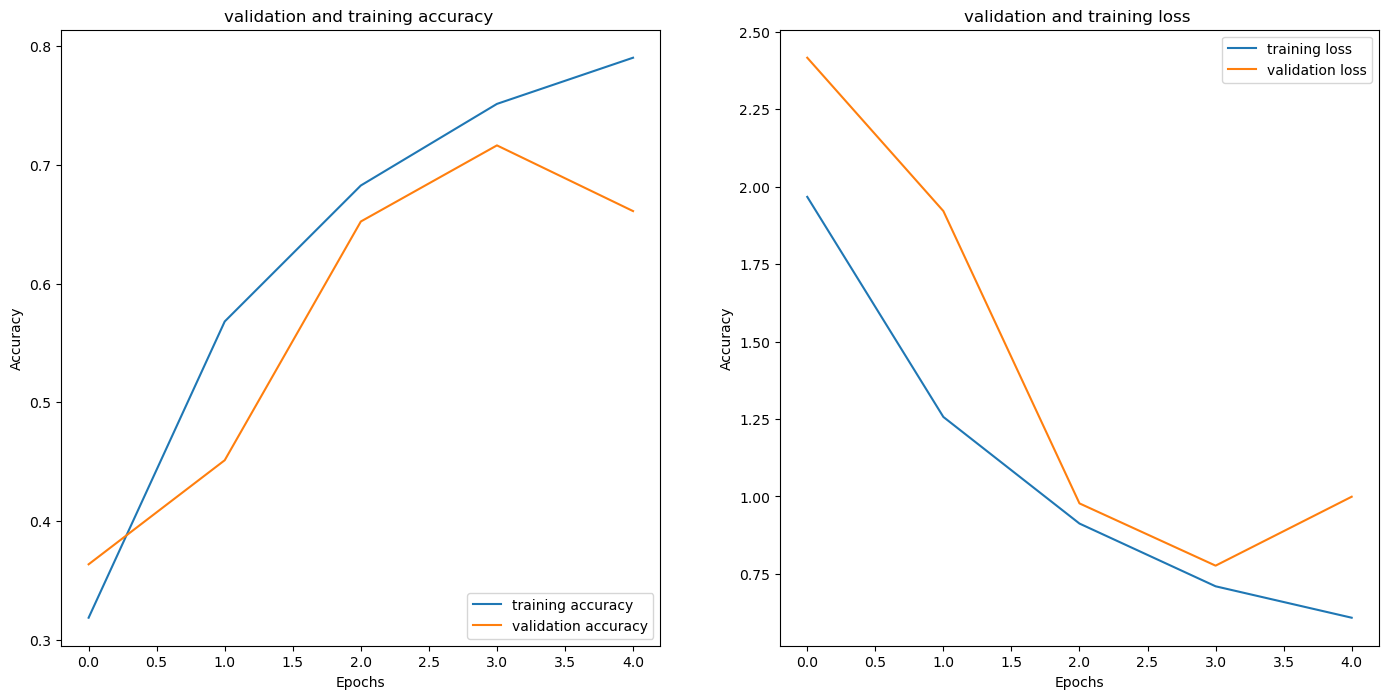

In [41]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='training accuracy')
plt.plot(range(Epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy') 
plt.title('validation and training accuracy ')

plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label='training loss')
plt.plot(range(Epochs),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('validation and training loss ')
plt.show()

[[[211 206 213]
  [198 193 200]
  [200 195 202]
  ...
  [204 203 221]
  [204 202 226]
  [204 201 228]]

 [[207 202 209]
  [208 203 210]
  [219 214 221]
  ...
  [202 201 219]
  [202 200 224]
  [201 198 225]]

 [[209 204 211]
  [206 201 208]
  [211 206 213]
  ...
  [202 201 219]
  [202 200 222]
  [202 200 224]]

 ...

 [[129 117 139]
  [130 118 140]
  [122 110 132]
  ...
  [154 141 159]
  [156 141 160]
  [156 141 160]]

 [[148 136 158]
  [132 120 142]
  [127 115 137]
  ...
  [149 136 154]
  [120 105 124]
  [163 148 167]]

 [[127 115 137]
  [117 105 127]
  [124 112 134]
  ...
  [127 114 132]
  [136 121 140]
  [149 134 153]]]


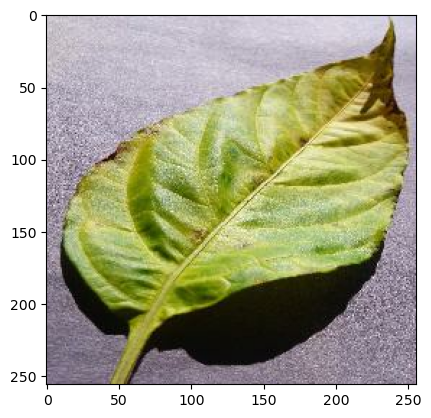

In [42]:
for image_batch,label_batch in test_ds.take(1):
    print(
        image_batch[0].numpy().astype('uint8')
    )
    plt.imshow(
        image_batch[0].numpy().astype('uint8')
    )




my first image to predict is 
 AxesImage(shape=(256, 256, 3))
my first image actual label
 Tomato_Spider_mites_Two_spotted_spider_mite


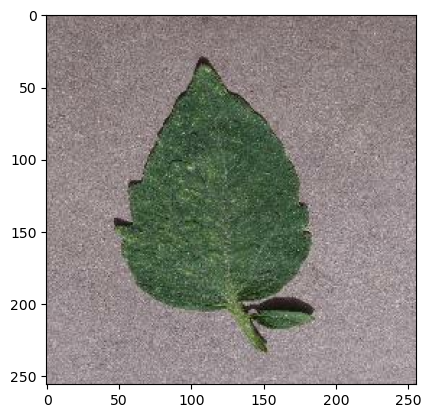

In [43]:
for image_batch,label_batch in test_ds.take(1):
   first_image = image_batch[0].numpy().astype('uint8')
   first_label = label_batch[0].numpy()


   print('my first image to predict is \n',plt.imshow(
        image_batch[0].numpy().astype('uint8')
    ))
   

   print('my first image actual label\n',class_names[first_label]
    )
   


   


In [46]:
import numpy
for image_batch,label_batch in test_ds.take(1):
    batch_prediction = model.predict(image_batch)
    # print(batch_prediction[0])
    # print(batch_prediction)
    print("predicted label : ",class_names[numpy.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
predicted label :  Tomato_Bacterial_spot


In [47]:
import numpy
numpy.argmax([9.99999881e-01, 6.58164439e-08 ,3.59647948e-25])

0

In [48]:
def predict(model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims (img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[numpy.argmax(predictions[0])]

    confidence = round(100 * (numpy.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


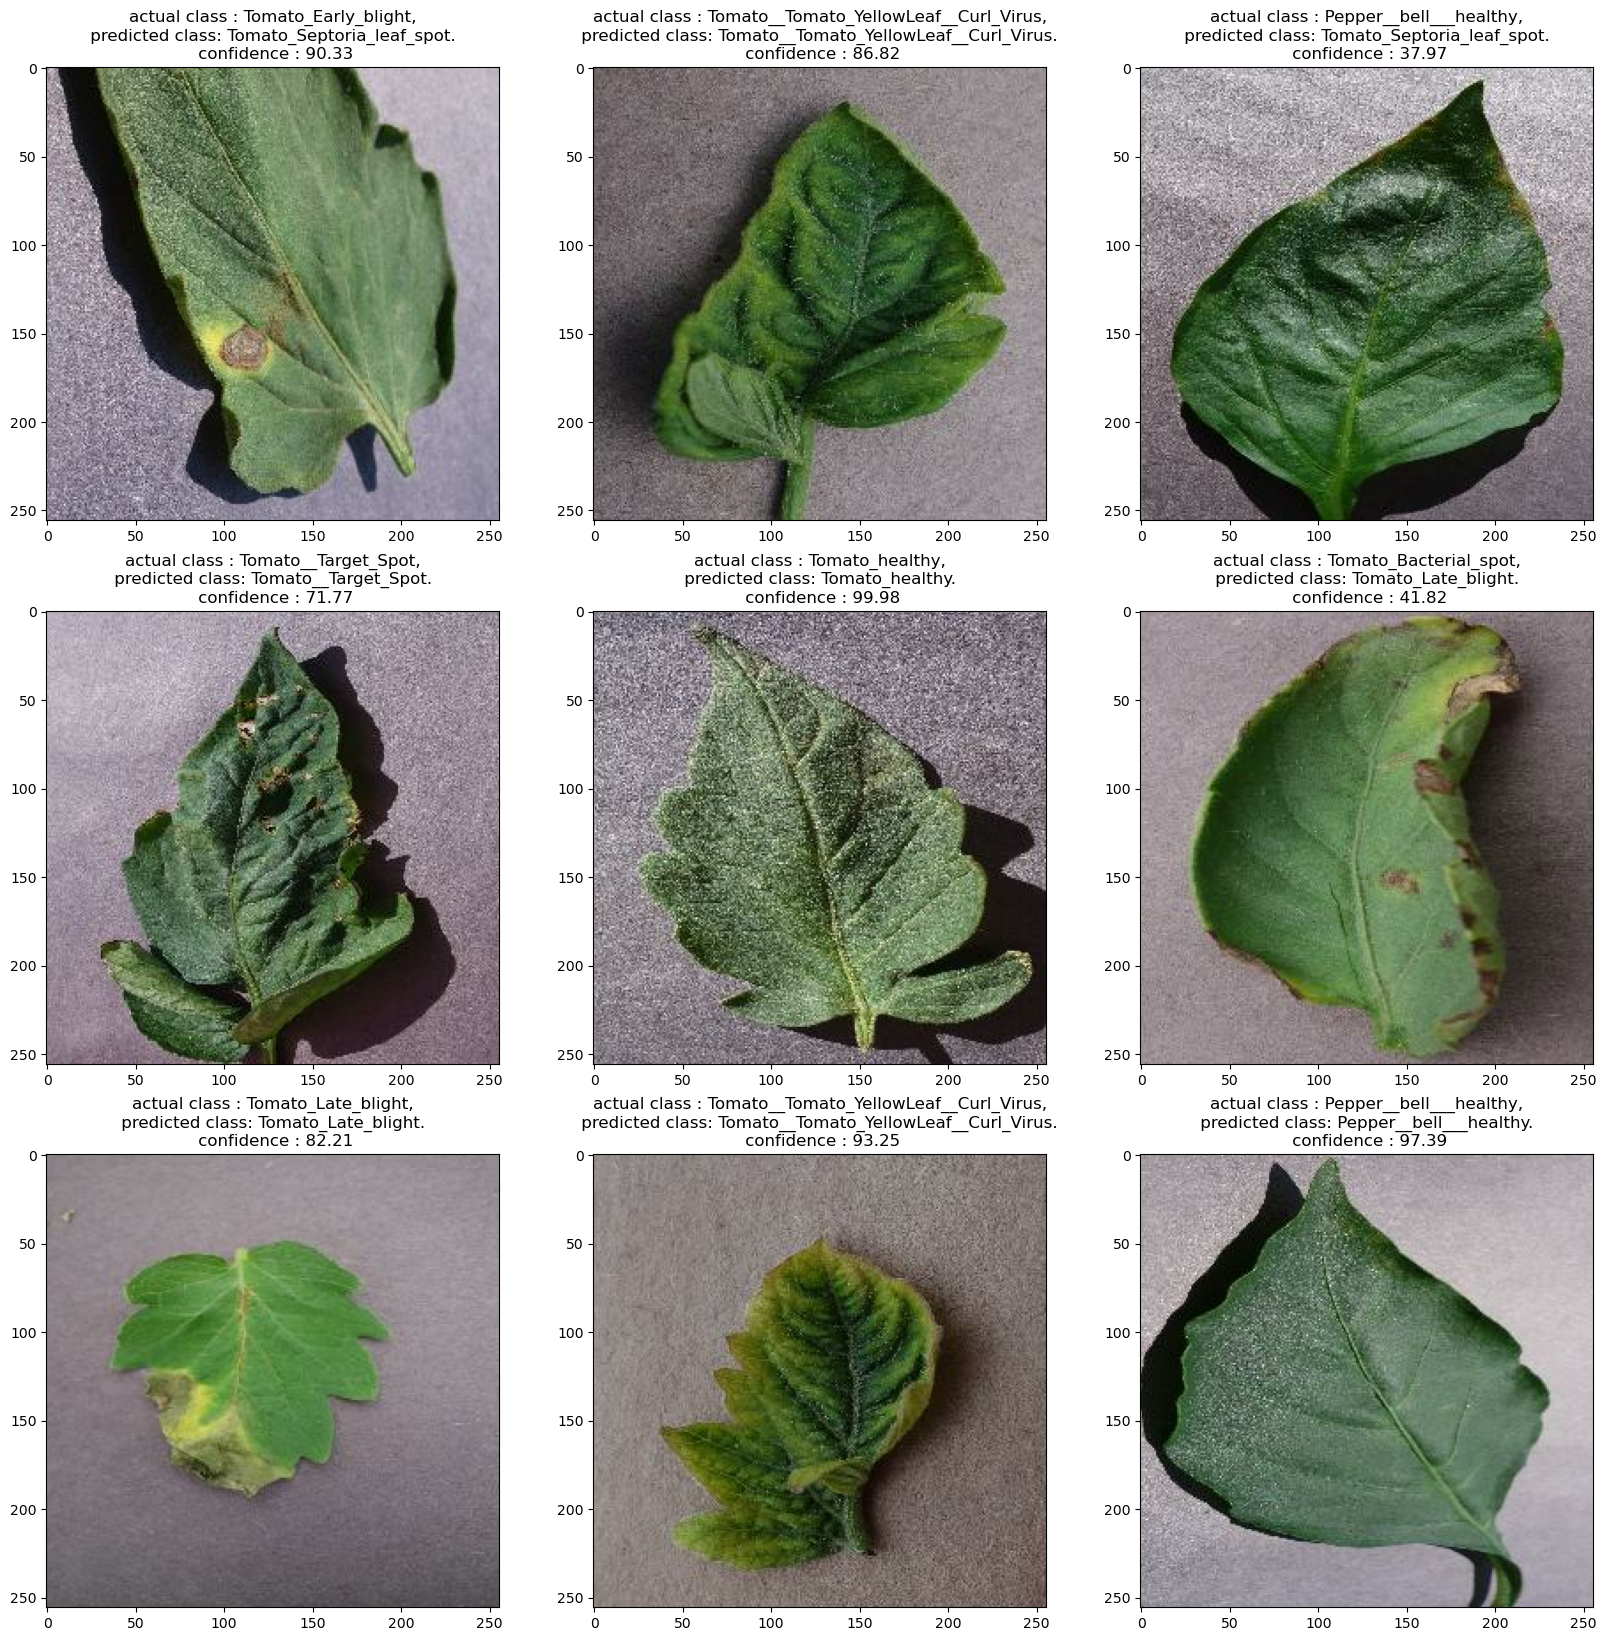

In [52]:
plt.figure(figsize=(20,20))
for images ,lables in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[lables[i]]

        plt.title(f"actual class : {actual_class},\n predicted class: {predicted_class}. \n confidence : {confidence}")

In [50]:
model.export('../models/2')


INFO:tensorflow:Assets written to: ../models/2/assets


INFO:tensorflow:Assets written to: ../models/2/assets


Saved artifact at '../models/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  6271382160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6271382352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6271384656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6271385232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13028704336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13028705104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13028705296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13028704720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13028705488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13028706064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13028705872: TensorSpec(shape=(), dtype=tf.resource, name=None